In [99]:
pip install beautifulsoup4 

Note: you may need to restart the kernel to use updated packages.


In [100]:
pip install panda

Note: you may need to restart the kernel to use updated packages.


In [102]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import pandas as pd
import re
df = pd.read_excel(r'C:\Users\baijinpeng\Downloads\意大利线上竞争 (1).xlsx')
df

,Week,Day,Brand,PDT,SPEC,Promo,Rank,Description,Discount,RRP
0,W16,2022-04-21,Samsung,Galaxy A22 5G,4+64,161.90,2,"6,6 Pollici , Display Infinity-V FHD+, Telefon...",-0.35,249.0
1,W16,2022-04-21,Samsung,Galaxy A52s 5G,6+128,276.90,4,"Display Infinity-O FHD+ da 6,5 pollici, 6GB RA...",-0.41,469.9
2,W16,2022-04-21,Realme,GT Master Edition,6+128,241.39,6,"Qualcomm Snapdragon 778G 5G, Samsung AMOLED Fu...",-0.31,349.0
3,W16,2022-04-21,Motorola,moto g60s,6+128,199.90,10,"(Quad Camera 64 MP, Display FullHD+ 6.8"" 120 H...",-0.29,279.9
4,W16,2022-04-21,Samsung,Galaxy A52,6+128,239.89,12,"Display Infinity-O FHD+ da 6,5 pollici, 6 GB R...",-0.37,379.9
...,...,...,...,...,...,...,...,...,...,...
250,W18,2022-05-05,Samsung,Galaxy S20 FE,6+128,343.89,22,"Samsung Smartphone Galaxy S20 FE, Display 6.5""...",NaN,NaN
251,W18,2022-05-05,Realme,GT Neo 2,8+128,308.60,24,"realme GT Neo 2 Smartphone, Processore Qualcom...",NaN,NaN
252,W18,2022-05-05,Samsung,Galaxy A22 5G,4+64,169.99,26,"Samsung Galaxy A22 5G Smartphone 6,6 Pollici ,...",NaN,NaN
253,W18,2022-05-05,Realme,GT Master Edition,8+256,268.00,28,"realme GT Master Edition Smartphone, Qualcomm ...",NaN,NaN


In [103]:
df = df.drop(['Discount','RRP'],axis = 1)

In [104]:
df

,Week,Day,Brand,PDT,SPEC,Promo,Rank,Description
0,W16,2022-04-21,Samsung,Galaxy A22 5G,4+64,161.90,2,"6,6 Pollici , Display Infinity-V FHD+, Telefon..."
1,W16,2022-04-21,Samsung,Galaxy A52s 5G,6+128,276.90,4,"Display Infinity-O FHD+ da 6,5 pollici, 6GB RA..."
2,W16,2022-04-21,Realme,GT Master Edition,6+128,241.39,6,"Qualcomm Snapdragon 778G 5G, Samsung AMOLED Fu..."
3,W16,2022-04-21,Motorola,moto g60s,6+128,199.90,10,"(Quad Camera 64 MP, Display FullHD+ 6.8"" 120 H..."
4,W16,2022-04-21,Samsung,Galaxy A52,6+128,239.89,12,"Display Infinity-O FHD+ da 6,5 pollici, 6 GB R..."
...,...,...,...,...,...,...,...,...
250,W18,2022-05-05,Samsung,Galaxy S20 FE,6+128,343.89,22,"Samsung Smartphone Galaxy S20 FE, Display 6.5""..."
251,W18,2022-05-05,Realme,GT Neo 2,8+128,308.60,24,"realme GT Neo 2 Smartphone, Processore Qualcom..."
252,W18,2022-05-05,Samsung,Galaxy A22 5G,4+64,169.99,26,"Samsung Galaxy A22 5G Smartphone 6,6 Pollici ,..."
253,W18,2022-05-05,Realme,GT Master Edition,8+256,268.00,28,"realme GT Master Edition Smartphone, Qualcomm ..."


In [105]:
Galaxy_A22_5G = df[df["PDT"] == "Galaxy A22 5G"]
Galaxy_A22_5G = Galaxy_A22_5G[Galaxy_A22_5G["SPEC"] == "4+64"]
Galaxy_A52s_5G = df[df["PDT"] == "Galaxy A52s 5G"]
Galaxy_A52s_5G = Galaxy_A52s_5G[Galaxy_A52s_5G["SPEC"] == "6+128"]
GT_Master_Edition = df[df["PDT"] == "GT Master Edition"]
GT_Master_Edition = GT_Master_Edition[GT_Master_Edition["SPEC"] == "6+128"]
moto_g60s = df[df["PDT"] == "Moto g60s"]
moto_g60s = moto_g60s[moto_g60s["SPEC"] =="6+128"]
A54s = df[df["PDT"] == "A54s"]

In [107]:
Galaxy_A22_5G

,Week,Day,Brand,PDT,SPEC,Promo,Rank,Description
0,W16,2022-04-21,Samsung,Galaxy A22 5G,4+64,161.90,2,"6,6 Pollici , Display Infinity-V FHD+, Telefon..."
20,W17,2022-04-25,Samsung,Galaxy A22 5G,4+64,161.90,1,"6,6 Pollici , Display Infinity-V FHD+, Telefon..."
43,W17,2022-04-26,Samsung,Galaxy A22 5G,4+64,161.18,1,"6,6 Pollici , Display Infinity-V FHD+, Telefon..."
64,W17,2022-04-26,Samsung,Galaxy A22 5G,4+64,169.99,34,"6,6 Pollici , Display Infinity-V FHD+, Telefon..."
65,W17,2022-04-27,Samsung,Galaxy A22 5G,4+64,165.90,1,"6,6 Pollici , Display Infinity-V FHD+, Telefon..."
71,W17,2022-04-27,Samsung,Galaxy A22 5G,4+64,169.99,15,"6,6 Pollici , Display Infinity-V FHD+, Telefon..."
88,W17,2022-04-28,Samsung,Galaxy A22 5G,4+64,165.90,1,"6,6 Pollici , Display Infinity-V FHD+, Telefon..."
108,W17,2022-04-29,Samsung,Galaxy A22 5G,4+64,165.90,1,"6,6 Pollici , Display Infinity-V FHD+, Telefon..."
132,W17,2022-04-30,Samsung,Galaxy A22 5G,4+64,165.90,1,"6,6 Pollici , Display Infinity-V FHD+, Telefon..."
157,W17,2022-05-01,Samsung,Galaxy A22 5G,4+64,163.50,3,"6,6 Pollici , Display Infinity-V FHD+, Telefon..."


<AxesSubplot:title={'center':'OPPO A54s'}, xlabel='Day', ylabel='Promo'>

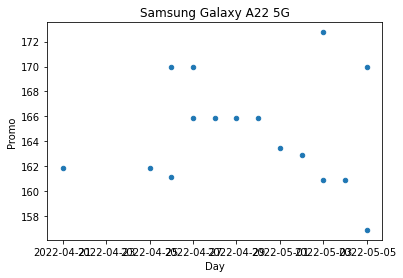

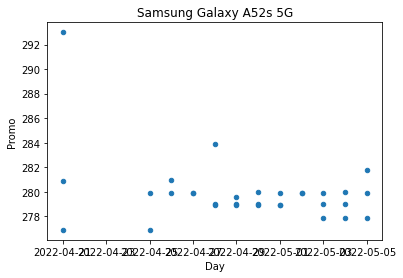

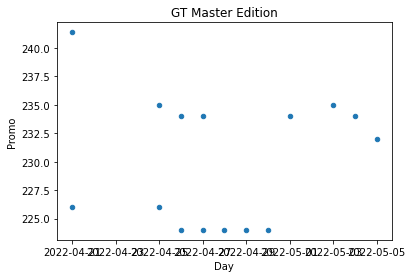

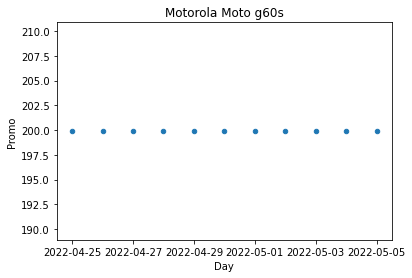

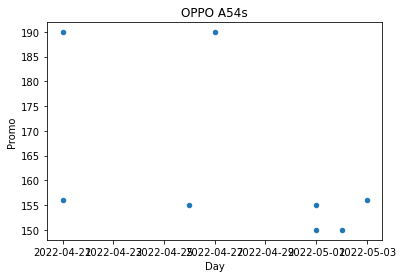

In [113]:
Galaxy_A22_5G.plot(x ='Day', y='Promo', kind = 'scatter', title = 'Samsung Galaxy A22 5G',)
Galaxy_A52s_5G.plot(x ='Day', y='Promo', kind = 'scatter', title = 'Samsung Galaxy A52s 5G')
GT_Master_Edition.plot(x ='Day', y='Promo', kind = 'scatter', title = 'GT Master Edition')
moto_g60s.plot(x ='Day', y='Promo', kind = 'scatter', title = 'Motorola Moto g60s')
A54s.plot(x ='Day', y='Promo', kind = 'scatter', title = 'OPPO A54s')

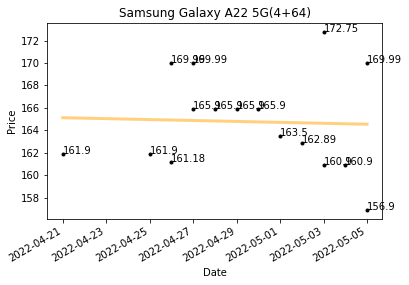

In [124]:
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd

from sklearn import linear_model

data_time = np.asarray(Galaxy_A22_5G["Day"])
data_count = np.asarray(Galaxy_A22_5G["Promo"])

df = pd.DataFrame({'time': data_time, 'count': data_count})
df.time = pd.to_datetime(df.time)

regr = linear_model.LinearRegression()
regr.fit(df.time.values.reshape(-1, 1), df['count'].values.reshape(-1, 1))

# Make predictions using the testing set
y_pred = regr.predict(df.time.values.astype(float).reshape(-1, 1))
df['pred'] = y_pred

ax = df.plot(x='time', y='count', color='black', style='.', legend=None)
df.plot(x='time', y='pred', color='orange', linewidth=3, ax=ax, alpha=0.5, legend = None)
ax.set_title('Samsung Galaxy A22 5G(4+64)')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
for index in range(len(data_time)):
  ax.text(data_time[index], data_count[index], s=data_count[index])
plt.show()

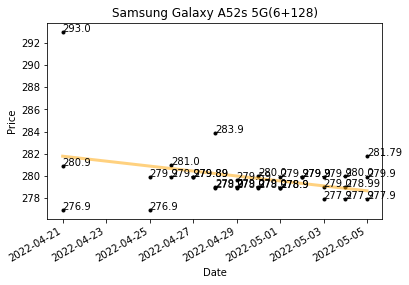

In [120]:
data_time = np.asarray(Galaxy_A52s_5G["Day"])
data_count = np.asarray(Galaxy_A52s_5G["Promo"])

df = pd.DataFrame({'time': data_time, 'count': data_count})
df.time = pd.to_datetime(df.time)

regr = linear_model.LinearRegression()
regr.fit(df.time.values.reshape(-1, 1), df['count'].values.reshape(-1, 1))

# Make predictions using the testing set
y_pred = regr.predict(df.time.values.astype(float).reshape(-1, 1))
df['pred'] = y_pred

ax = df.plot(x='time', y='count', color='black', style='.', legend=None)
df.plot(x='time', y='pred', color='orange', linewidth=3, ax=ax, alpha=0.5, legend = None)
ax.set_title('Samsung Galaxy A52s 5G(6+128)')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

for index in range(len(data_time)):
  ax.text(data_time[index], data_count[index], s=data_count[index])
plt.show()

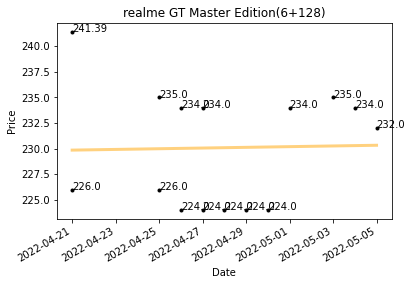

In [121]:
data_time = np.asarray(GT_Master_Edition["Day"])
data_count = np.asarray(GT_Master_Edition["Promo"])

df = pd.DataFrame({'time': data_time, 'count': data_count})
df.time = pd.to_datetime(df.time)

regr = linear_model.LinearRegression()
regr.fit(df.time.values.reshape(-1, 1), df['count'].values.reshape(-1, 1))

# Make predictions using the testing set
y_pred = regr.predict(df.time.values.astype(float).reshape(-1, 1))
df['pred'] = y_pred

ax = df.plot(x='time', y='count', color='black', style='.', legend=None)
df.plot(x='time', y='pred', color='orange', linewidth=3, ax=ax, alpha=0.5, legend=None)
ax.set_title('realme GT Master Edition(6+128)')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
for index in range(len(data_time)):
  ax.text(data_time[index], data_count[index], s=data_count[index])
plt.show()

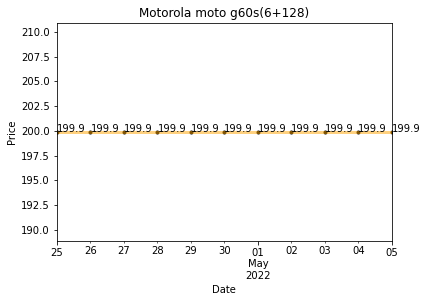

In [122]:
data_time = np.asarray(moto_g60s["Day"])
data_count = np.asarray(moto_g60s["Promo"])

df = pd.DataFrame({'time': data_time, 'count': data_count})
df.time = pd.to_datetime(df.time)

regr = linear_model.LinearRegression()
regr.fit(df.time.values.reshape(-1, 1), df['count'].values.reshape(-1, 1))

# Make predictions using the testing set
y_pred = regr.predict(df.time.values.astype(float).reshape(-1, 1))
df['pred'] = y_pred

ax = df.plot(x='time', y='count', color='black', style='.', legend=None)
df.plot(x='time', y='pred', color='orange', linewidth=3, ax=ax, alpha=0.5, legend=None)
ax.set_title('Motorola moto g60s(6+128)')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
for index in range(len(data_time)):
  ax.text(data_time[index], data_count[index], s=data_count[index])
plt.show()

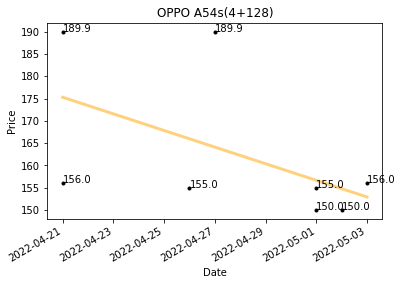

In [127]:
data_time = np.asarray(A54s["Day"])
data_count = np.asarray(A54s["Promo"])

df = pd.DataFrame({'time': data_time, 'count': data_count})
df.time = pd.to_datetime(df.time)

regr = linear_model.LinearRegression()
regr.fit(df.time.values.reshape(-1, 1), df['count'].values.reshape(-1, 1))

# Make predictions using the testing set
y_pred = regr.predict(df.time.values.astype(float).reshape(-1, 1))
df['pred'] = y_pred

ax = df.plot(x='time', y='count', color='black', style='.', legend=None)
df.plot(x='time', y='pred', color='orange', linewidth=3, ax=ax, alpha=0.5, legend=None)
ax.set_title('OPPO A54s(4+128)')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
for index in range(len(data_time)):
  ax.text(data_time[index], data_count[index], s=data_count[index])
plt.show()